In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# Чтение файла датасета
df = pd.read_csv('spam_csv.csv', encoding ='latin_1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Text(0, 0.5, '')

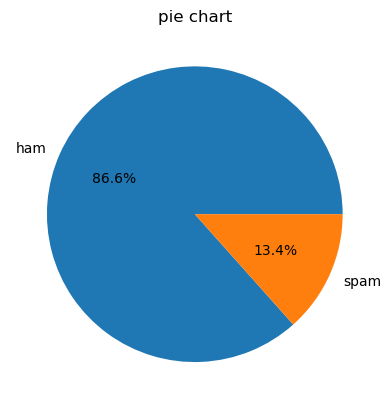

In [7]:
# Построение круговой диаграммы целевых значений
# Выбираем столбец, который будем оценивать
target = df['v1'].value_counts(dropna=False)
# Построение круговой диграммы с указанием долей
target.plot(kind = 'pie', autopct='%1.1f%%') #Тип диаграммы - круговая, вывод процентных значений
plt.title('pie chart')
plt.ylabel('')

   words in non-spam  count
0                 to   1530
1                you   1458
2                  I   1436
3                the   1019
4                  a    969
5                and    738
6                  i    736
7                 in    734
8                  u    645
9                 is    638
10                my    619
11                me    537
12                of    498
13               for    475
14              that    398
15                it    375
16              your    373
17                on    352
18              have    346
19                at    333


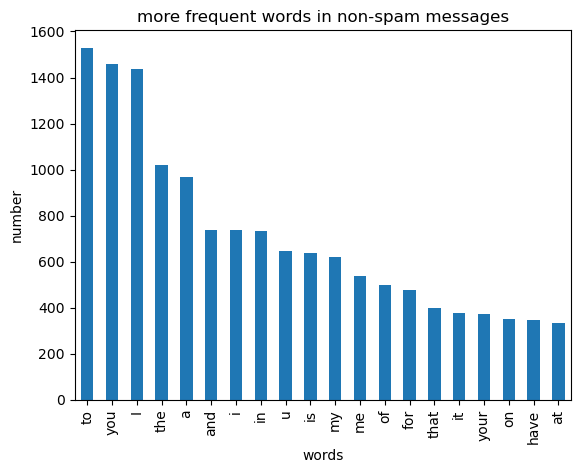

In [8]:
# Определим наиболее часто встречающиеся слова
from collections import Counter
# Выведем 20 наиболее часто встречающихся слов не относящихся к спаму
ham_words = Counter(" ".join(df[df["v1"]=="ham"]["v2"]).split()).most_common(20)
# Создание датафрейма из массива данных
df_ham_words = pd.DataFrame.from_dict(ham_words)
# Возьмем массив с наиболее часто употребляемыми словами и переменуем столбец "0" в "слова без спама",
# а столбец "1" в "количество"
df_ham_words = df_ham_words.rename(columns={0: 'words in non-spam',1:'count'})
# Отобразаем 20 наиболее часто употребимых слов
print(df_ham_words)

# Построение столбчатой диаграммы по датафрейму слов, отличных от спама
df_ham_words.plot.bar(legend = False) #Построение столбиковой диаграммы
y_pos = np.arange(len(df_ham_words['words in non-spam'])) #Задаем шкалу по у
plt.xticks(y_pos, df_ham_words['words in non-spam'])
plt.title('more frequent words in non-spam messages') #Заголовок
plt.xlabel('words') #По оси X пишем сами слова
plt.ylabel('number') #По оси Y пишем количества слов
plt.show() #Построение диаграммы

   words in spam  count
0             to    604
1              a    358
2           your    187
3           call    185
4             or    185
5            the    178
6              2    169
7            for    169
8            you    164
9             is    143
10          Call    136
11            on    135
12          have    128
13           and    119
14          from    116
15            ur    107
16          with    101
17             &     98
18             4     93
19            of     93


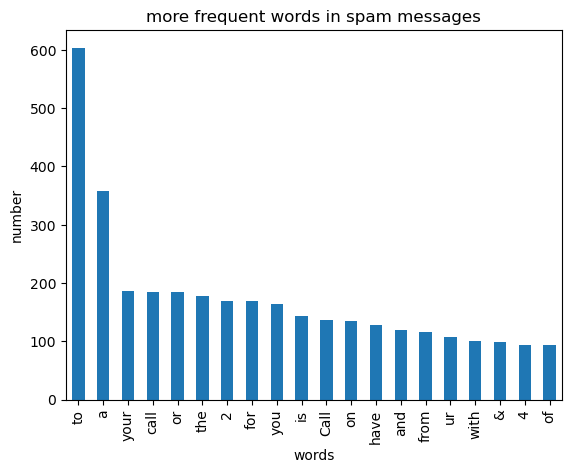

In [9]:
# Выведем 20 наиболее часто встречающихся слов со спамом
spam_words = Counter(" ".join(df[df["v1"]=="spam"]["v2"]).split()).most_common(20)
# Создание датафрейма из массива данных
df_spam_words = pd.DataFrame.from_dict(spam_words)
# Возьмем массив с наиболее часто употребляемыми словами и переменуем столбец "0" в "слова со спамом",
# а столбец "1" в "количество"
df_spam_words = df_spam_words.rename(columns={0: 'words in spam',1:'count'})
# Отобразаем 20 наиболее часто употребимых слов
print(df_spam_words)

# Построение столбчатой диаграммы по датафрейму слов, отличных от спама
df_spam_words.plot.bar(legend = False) #Построение столбиковой диаграммы
y_pos = np.arange(len(df_spam_words['words in spam'])) #Задаем шкалу по у
plt.xticks(y_pos, df_spam_words['words in spam'])
plt.title('more frequent words in spam messages') #Заголовок
plt.xlabel('words') #По оси X пишем сами слова
plt.ylabel('number') #По оси Y пишем количества слов
plt.show() #Построение диаграммы

In [10]:
# Осуществляем токенизацию
from sklearn import feature_extraction
tokenizer = feature_extraction.text.CountVectorizer(stop_words = 'english') #Стоп слова относятся к английскому языку
X = tokenizer.fit_transform(df['v2']) #Возвращает преобразованный массив

# Разбиваем выборку на тренировочную и тестовую
from sklearn import model_selection
df['v1'] = df['v1'].map({'spam':1, 'ham':0})
#Разделение полученной выборки на тестовую и тренировочную
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['v1'], test_size = 0.33)

In [11]:
# Импортируем модель наивного Байесовского классификатора
from sklearn import naive_bayes, metrics

# Задаем диапазон для поиска альфа
alpha_range = np.arange(0.1, 20, 0.1)
count = 0 #Счетчик для отображения прохождения по массиву
#Массивы с данными оценок
train_score = np.zeros(len(alpha_range))
test_score = np.zeros(len(alpha_range))
test_recall = np.zeros(len(alpha_range))
test_precision = np.zeros(len(alpha_range))

for i in alpha_range:
    bayes = naive_bayes.MultinomialNB(alpha=i) #Перебор значений альфа в алгоритме Байесовского классификатора
    bayes.fit(X_train, y_train) #Производим обучение
    y_test_predict = bayes.predict(X_test)
    y_train_predict = bayes.predict(X_train)
    train_score[count]= metrics.accuracy_score(y_train, y_train_predict)
    test_score[count]= metrics.accuracy_score(y_test, y_test_predict)
    test_recall[count] = metrics.recall_score(y_test, y_test_predict)
    test_precision[count] = metrics.precision_score(y_test, y_test_predict)
    count = count + 1

In [12]:
matrix = np.matrix(np.c_[alpha_range, train_score, test_score, test_recall, test_precision])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'train accuracy', 'test accuracy', 'test recall', 'test precision'])
print(models)

     alpha  train accuracy  test accuracy  test recall  test precision
0      0.1        0.996250       0.978793     0.974468        0.874046
1      0.2        0.996250       0.979337     0.974468        0.877395
2      0.3        0.996250       0.980968     0.970213        0.890625
3      0.4        0.996250       0.980968     0.970213        0.890625
4      0.5        0.995714       0.980968     0.970213        0.890625
..     ...             ...            ...          ...             ...
194   19.5        0.974283       0.973355     0.791489        1.000000
195   19.6        0.974283       0.973355     0.791489        1.000000
196   19.7        0.974016       0.973355     0.791489        1.000000
197   19.8        0.973748       0.973355     0.791489        1.000000
198   19.9        0.973748       0.973355     0.791489        1.000000

[199 rows x 5 columns]


In [13]:
#Выбираем наилучшую alpha по метрике precision в тестовой выборке
best_index = models['test precision'].idxmax()
models.iloc[best_index, :]
models[models['test precision']==1].head(n=5)

,alpha,train accuracy,test accuracy,test recall,test precision
121,12.2,0.981516,0.979337,0.838298,1.0
122,12.3,0.981516,0.979337,0.838298,1.0
123,12.4,0.981516,0.979337,0.838298,1.0
124,12.5,0.981248,0.978793,0.834043,1.0
125,12.6,0.981248,0.978793,0.834043,1.0


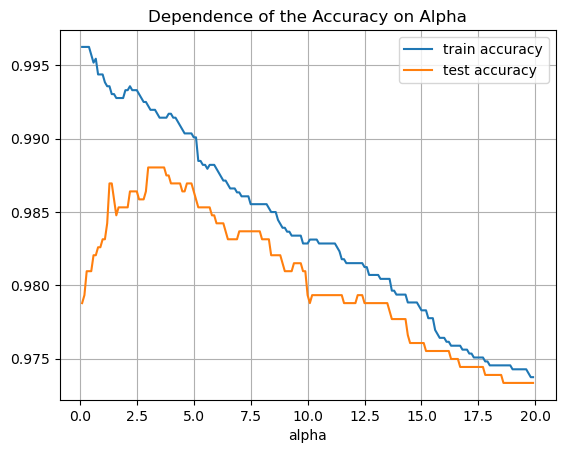

In [14]:
# Обучение нового классификатора по найденному оптимальному параметру
model = naive_bayes.MultinomialNB(alpha = alpha_range[best_index])
model.fit(X_train, y_train)
models.iloc[best_index, :]

# Построение зависимости метрики accuracy на обучающих и тестовых данных от варьируемого параметра alpha
models.plot(x="alpha", y=["train accuracy", "test accuracy"])
plt.title("Dependence of the Accuracy on Alpha")
plt.grid("on")
plt.show()

In [15]:
#Построение матрицы ошибок
confusion_matrix = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted ham', 'predicted spam'], index = ['actual ham', 'actual spam'])

,predicted ham,predicted spam
actual ham,1604,0
actual spam,49,186


AUC-ROC - 0.9736403671671883


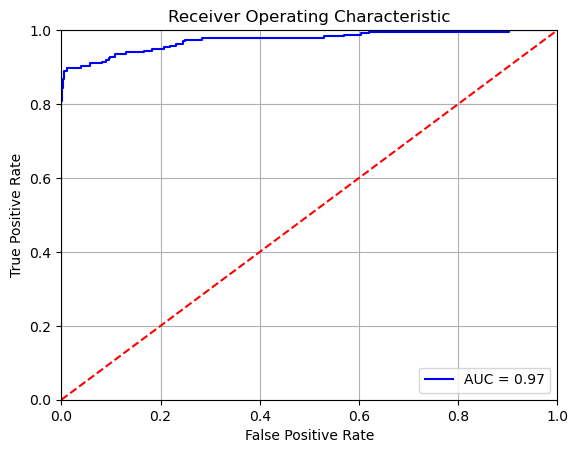

In [16]:
#Построение ROC-кривой и расчет метрики AUC-ROC
y_pred_pr = bayes.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics. roc_curve (y_test, y_pred_pr)
#Значение AUC-ROC (печать численного значения)
roc_auc = metrics.auc(fpr, tpr)
print("AUC-ROC -", roc_auc)
#Построение графика
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()

In [17]:
# Нахождение оптимального параметра регуляризатора С для модели опорных векторов по метрикам precision и accuracy
list_C = np.arange(0.01, 3, 0.1)
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1

In [18]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.01,0.862845,0.872213,0.000000,0.000000
1,0.11,0.864988,0.873301,0.008511,1.000000
2,0.21,0.911331,0.891789,0.153191,1.000000
3,0.31,0.965711,0.927678,0.434043,1.000000
4,0.41,0.983391,0.955411,0.651064,1.000000
5,0.51,0.988749,0.967374,0.744681,1.000000
6,0.61,0.991160,0.972811,0.787234,1.000000
7,0.71,0.991964,0.976074,0.821277,0.989744
8,0.81,0.993303,0.977705,0.834043,0.989899
9,0.91,0.994374,0.979880,0.851064,0.990099


In [19]:
#Отобразим пять наилучших С, определенных по метрике качества
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]
models[models['Test Precision']==1].head(n=5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
1,0.11,0.864988,0.873301,0.008511,1.0
2,0.21,0.911331,0.891789,0.153191,1.0
3,0.31,0.965711,0.927678,0.434043,1.0
4,0.41,0.983391,0.955411,0.651064,1.0
5,0.51,0.988749,0.967374,0.744681,1.0


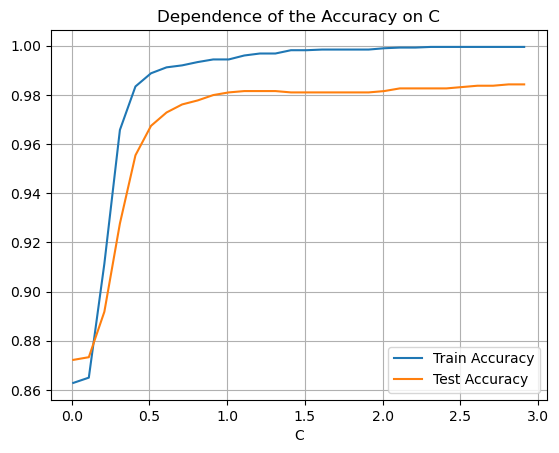

In [20]:
# Обучение нового классификатора по найденному оптимальному параметру
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

# Построение зависимости метрики accuracy на обучающих и тестовых данных от варьируемого параметра C
models.plot(x="C", y=["Train Accuracy", "Test Accuracy"])
plt.title("Dependence of the Accuracy on C")
plt.grid("on")
plt.show()

In [21]:
#Построение матрицы ошибок
confusion_matrix = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted ham', 'predicted spam'], index = ['actual ham', 'actual spam'])

,predicted ham,predicted spam
actual ham,1604,0
actual spam,49,186


AUC-ROC - 0.9736403671671883


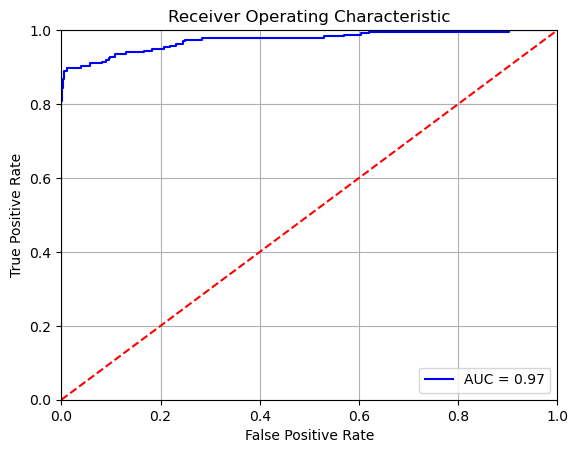

In [22]:
# Построение ROC-кривой и рассчет метрики AUC-ROC
y_pred_pr = bayes.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics. roc_curve (y_test, y_pred_pr)
#Вывод значения AUC-ROC
roc_auc = metrics.auc(fpr, tpr)
print("AUC-ROC -", roc_auc)
#Построение ROC-кривой
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('on')
plt.show()